In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import math
from keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix

In [2]:
Img_shape = 28
Num_classes = 10
test_size = 0.25
random_state = 1234
No_epochs = 100
Batch_size = 128

In [3]:
train_dataset = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test_dataset = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
def data_preprocessing(raw):
    label = tf.keras.utils.to_categorical(raw.label, 10)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image, label

X, y = data_preprocessing(train_dataset)
X_test, y_test = data_preprocessing(test_dataset)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

###  Train the model

In [7]:
img_shape = (28, 28, 1)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu',input_shape=img_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    tf.keras.layers.MaxPooling2D(pool_size=2, name='MaxPool'),
    tf.keras.layers.Dropout(0.25, name='Dropout-1'),
    tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    tf.keras.layers.Dropout(0.25, name='Dropout-2'),
    tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    tf.keras.layers.Dropout(0.4, name='Dropout-3'),
    tf.keras.layers.Flatten(name='flatten'),
    tf.keras.layers.Dense(128, activation='relu', name='Dense'),
    tf.keras.layers.Dropout(0.4, name='Dropout'),
    tf.keras.layers.Dense(10, activation='softmax', name='Output')
])

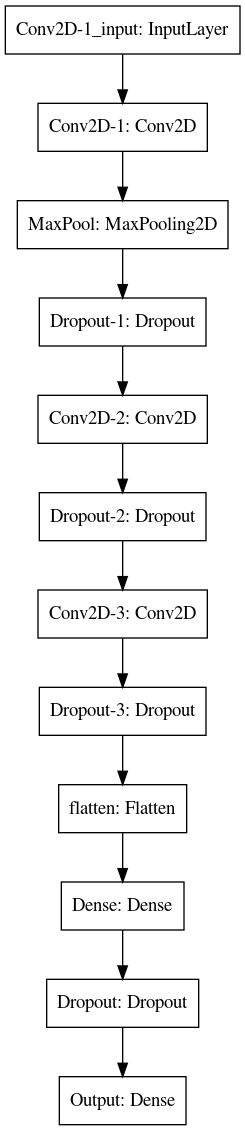

In [8]:
plot_model(model)

In [9]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer = optimizer,
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [10]:
train_model = model.fit(X_train, y_train,
                  batch_size=Batch_size,
                  epochs=150,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/150
352/352 [==============================] - 2s 7ms/step - loss: 0.6453 - accuracy: 0.7633 - val_loss: 0.4012 - val_accuracy: 0.8485
Epoch 2/150
352/352 [==============================] - 2s 6ms/step - loss: 0.4198 - accuracy: 0.8478 - val_loss: 0.3302 - val_accuracy: 0.8757
Epoch 3/150
352/352 [==============================] - 2s 6ms/step - loss: 0.3583 - accuracy: 0.8699 - val_loss: 0.2929 - val_accuracy: 0.8913
Epoch 4/150
352/352 [==============================] - 2s 6ms/step - loss: 0.3235 - accuracy: 0.8836 - val_loss: 0.2690 - val_accuracy: 0.9041
Epoch 5/150
352/352 [==============================] - 2s 6ms/step - loss: 0.2949 - accuracy: 0.8935 - val_loss: 0.2620 - val_accuracy: 0.9052
Epoch 6/150
352/352 [==============================] - 2s 6ms/step - loss: 0.2826 - accuracy: 0.8978 - val_loss: 0.2630 - val_accuracy: 0.9026
Epoch 7/150
352/352 [==============================] - 2s 6ms/step - loss: 0.2636 - accuracy: 0.9040 - val_loss: 0.2440 - val_accuracy: 0.9124

In [11]:
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0865 - accuracy: 0.9815
Test loss: 0.0865335613489151
Test accuracy: 0.9815333485603333


In [12]:
model.save("./")

## Confusion matrix

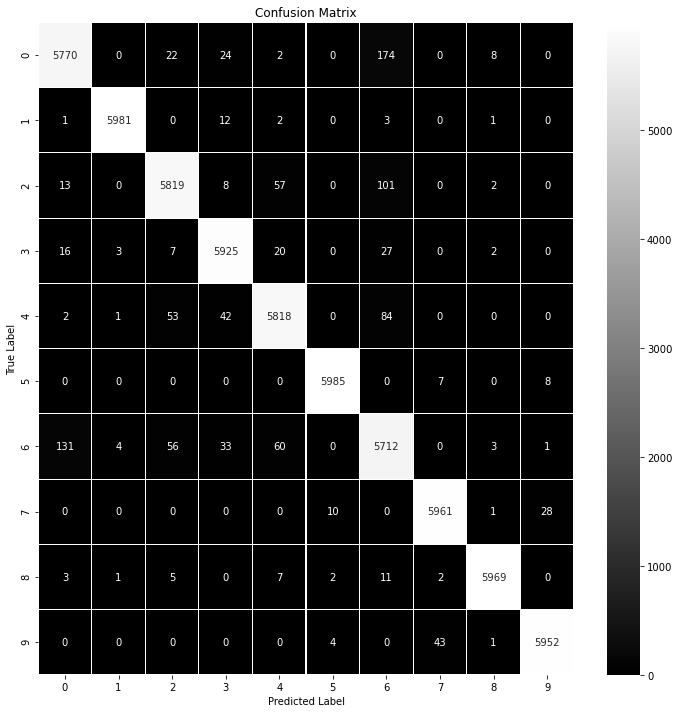

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Test runs

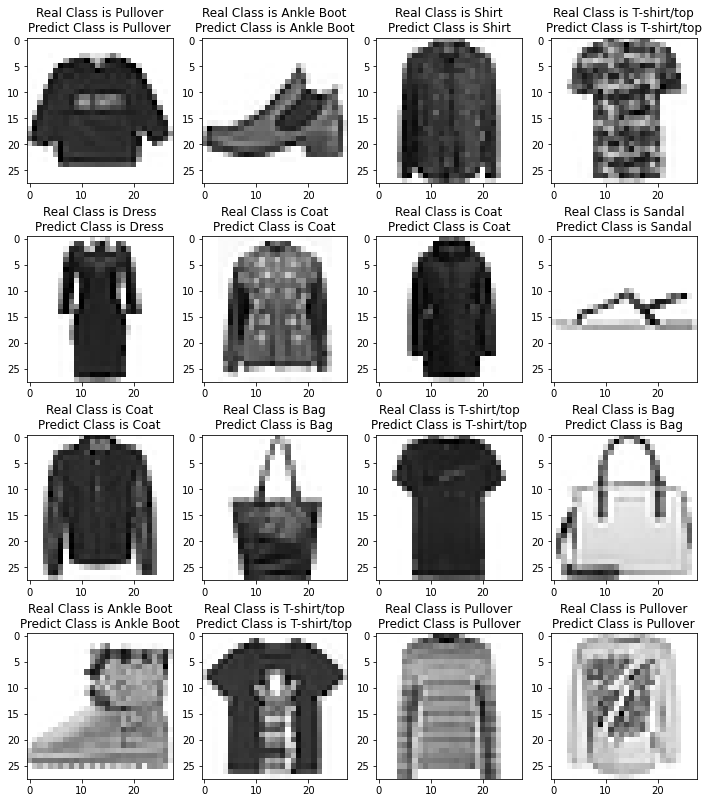

In [14]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}");